In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [2]:
#toto som sem dal, aby sa na jedno spustenie pripravil ten dataset tak ako ma byt, aby nebolo nutne spustat tolko buniek
train_data = pd.read_csv('data/train.csv')
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']

import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

for k in data.keys():
    train_data[k] = np.nan

for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
        
train_data = train_data.drop(columns=['medical_info'])

train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

In [4]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 35 columns):
Unnamed: 0            2800 non-null int64
age                   2519 non-null float64
on thyroxine          2800 non-null object
query on thyroxine    2800 non-null object
pregnant              2800 non-null object
thyroid surgery       2800 non-null object
I131 treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
TSH                   2516 non-null float64
T3 measured           2800 non-null object
T3                    2215 non-null float64
TT4                   2451 non-null object
T4U                   2503 non-null float64
FTI measured          2800 non-null object
TBG measured          2800 non-null object
TBG                   2800 non-null object
referral source       2800 non-null object
class                 2800 non

In [5]:
b = pd.Series(train_data['Unnamed: 0']) == pd.Series(np.arange(train_data.shape[0]))
b[b == False].count()

0

In [6]:
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [28]:
train_data['medical_info'][0]

"{'TSH measured':'t','sex':'M','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'88','sick':'f','T4U measured':'t','psych':'f','query hypothyroid':'f'}"

In [7]:
import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

for k in data.keys():
    train_data[k] = np.nan

In [8]:
for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
        
train_data = train_data.drop(columns=['medical_info'])
        
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,t,M,f,t,f,88,f,t,f,f
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,t,F,f,t,f,19,f,t,f,f
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,f,F,f,t,f,104,f,t,f,f
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,t,F,f,t,f,117,f,t,f,f
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,t,M,f,t,f,88,f,t,f,f


In [9]:
train_data['FTI'].unique()

array(['88', '19', '104', '117', '103', '112', '200', '129', '126', '127',
       '87', '90', '105', '107', '96', '101', '109', '89', '191', '113',
       '115', '74', '94', '?', '152', '99', '134', '116', '78', '76',
       '125', '83', '235', '75', '173', '207', '140', '98', '120', '106',
       '93', '138', '91', '209', '232', '102', '92', '160', '131', '68',
       '121', '110', '97', '108', '119', '149', '67', '133', '145', '85',
       '111', '124', '130', '165', '172', '122', '123', '147', '164',
       '114', '69', '100', '171', '148', '70', '73', '95', '65', '53',
       '9', '163', '86', '79', '143', '132', '128', '146', '118', '72',
       '153', '214', '137', '217', '51', '142', '82', '188', '144', '39',
       '64', '177', '28', '60', '41', '61', '156', '185', '182', '10',
       '170', '80', '203', '155', '247', '190', '135', '154', '52', '77',
       '150', '151', '24', '47', '197', '34', '224', '169', '168', '84',
       '213', '195', '222', '204', '194', '136', '81', '

In [14]:
train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

In [27]:
for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

In [7]:
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid,test,testID
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,t,M,f,t,f,88.0,f,t,f,f,negative,991
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,t,F,f,t,f,19.0,f,t,f,f,negative,1685
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,f,F,f,t,f,104.0,f,t,f,f,negative,3504
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,t,F,f,t,f,117.0,f,t,f,f,negative,1942
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,t,M,f,t,f,88.0,f,t,f,f,negative,2009


In [6]:
train_data.describe()

,age,TSH,T3,T4U,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,FTI
count,2519.000000,2516.000000,2215.000000,2503.000000,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000,2505.000000
mean,51.793569,4.672150,2.024966,0.997912,1.859808e+05,4.150714,789.960714,75.960357,38.336429,110.787984
std,20.541137,21.449453,0.824600,0.194390,1.009371e+05,327.452340,5813.819092,374.218100,11.877622,32.883986
min,1.000000,0.005000,0.050000,0.310000,1.939500e+04,-1600.000000,0.000000,0.000000,1.000000,2.000000
25%,36.000000,0.440000,1.600000,0.880000,1.185510e+05,9.000000,0.000000,0.000000,35.000000,93.000000
50%,54.000000,1.400000,2.000000,0.980000,1.772160e+05,10.000000,0.000000,0.000000,40.000000,107.000000
75%,67.000000,2.600000,2.400000,1.080000,2.276065e+05,13.000000,0.000000,0.000000,40.000000,124.000000
max,455.000000,478.000000,10.600000,2.120000,1.097453e+06,1500.000000,99999.000000,3683.000000,99.000000,395.000000


Tu je jednoznacne vidiet outliera s vekom viac ako 400 rokov.

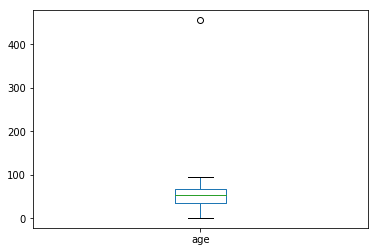

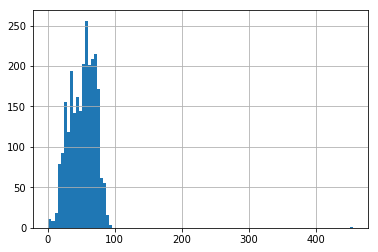

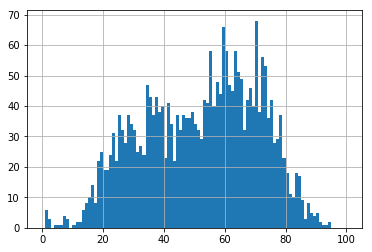

In [37]:
train_data['age'].plot.box()
plt.figure()
train_data['age'].hist(bins=100)
plt.figure()
train_data['age'].hist(bins=100, range=(0,100))
plt.figure()

Uvedena distribucia hodnot naznacuje, ze sa s velkou pravdepodobnostou nejedna o posunutu desatinnu ciarku, pretoze hodnoty TSH by potom mali priblzne rovnaku distribuci v jednotlivych intervaloch magnitudy 10

TSH viac ako 10 :  158
TSH viac ako 100 :  18


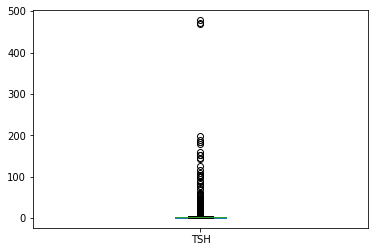

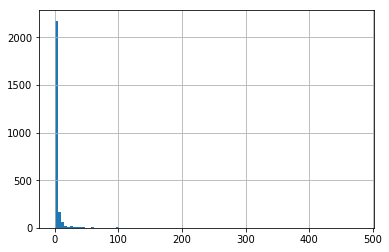

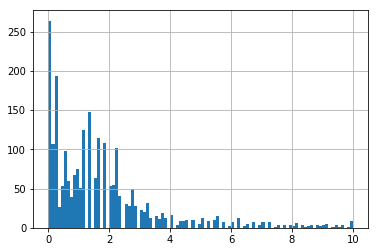

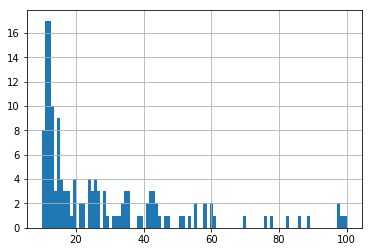

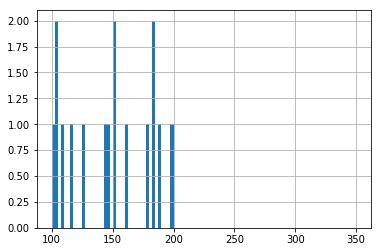

In [51]:
train_data['TSH'].plot.box()
plt.figure()
train_data['TSH'].hist(bins=100)
plt.figure()
train_data['TSH'].hist(bins=100, range=(0, 10.0))
plt.figure()
train_data['TSH'].hist(bins=100, range=(10.0, 100.0))
plt.figure()
train_data['TSH'].hist(bins=100, range=(100.0, 350.0))
plt.figure()

print ("TSH viac ako 10 : ", train_data['TSH'][train_data['TSH'] > 10].count())
print ("TSH viac ako 100 : ", train_data['TSH'][train_data['TSH'] > 100].count())

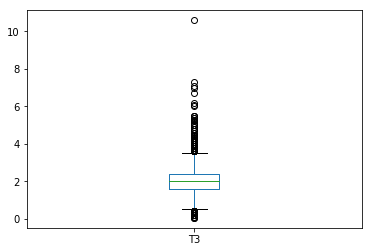

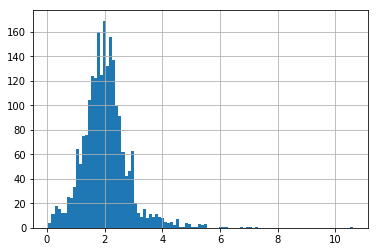

In [38]:
train_data['T3'].plot.box()
plt.figure()
train_data['T3'].hist(bins=100)
plt.figure()

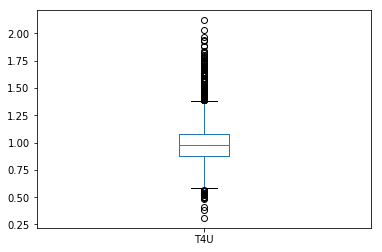

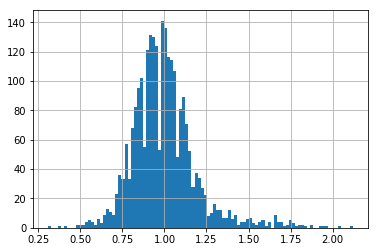

In [39]:
train_data['T4U'].plot.box()
plt.figure()
train_data['T4U'].hist(bins=100)
plt.figure()

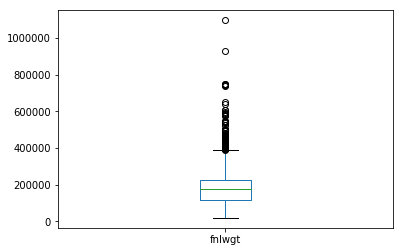

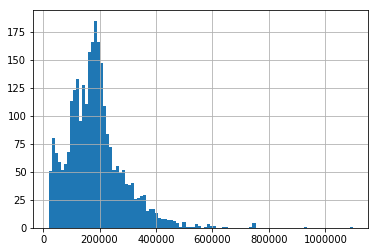

In [95]:
train_data['fnlwgt'].plot.box()
plt.figure()
train_data['fnlwgt'].hist(bins=100)
plt.figure()

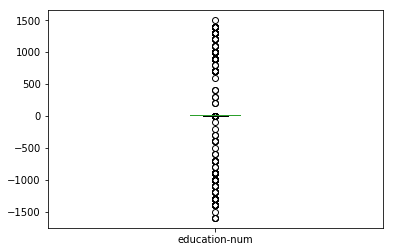

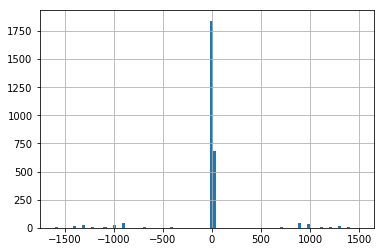

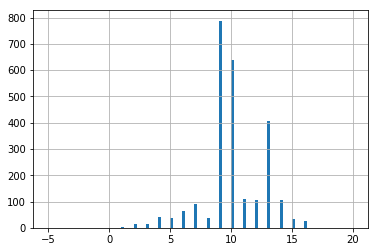

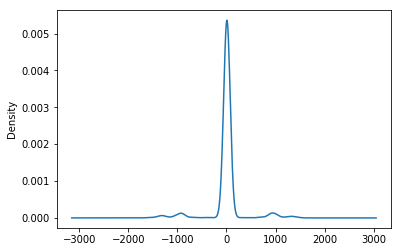

In [64]:
train_data['education-num'].plot.box()
plt.figure()
train_data['education-num'].hist(bins=100)
plt.figure()
train_data['education-num'].hist(bins=100, range=(-5, 20))
plt.figure()
train_data['education-num'].plot(kind="density")

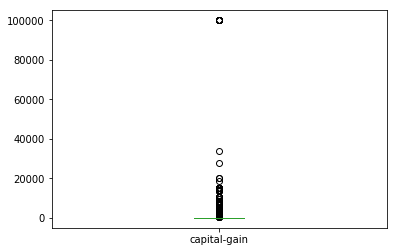

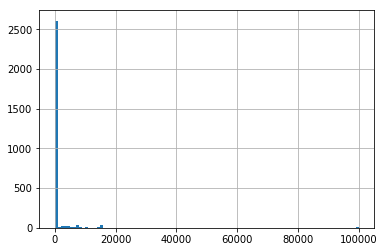

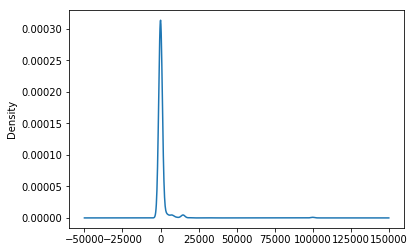

In [63]:
train_data['capital-gain'].plot.box()
plt.figure()
train_data['capital-gain'].hist(bins=100)
plt.figure()
train_data['capital-gain'].plot(kind="density")


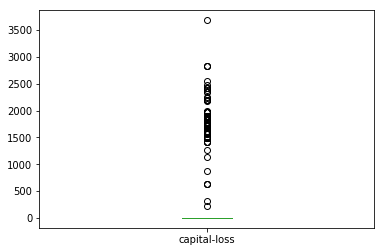

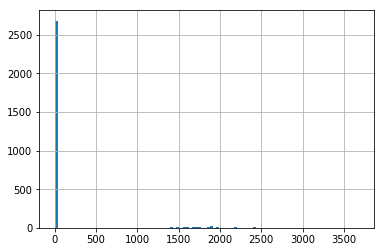

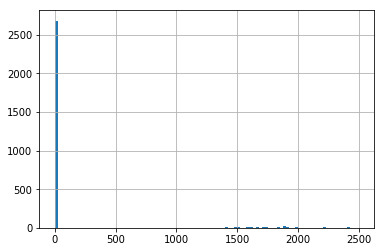

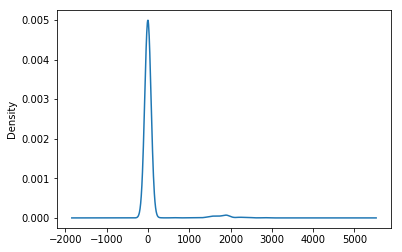

In [62]:
train_data['capital-loss'].plot.box()
plt.figure()
train_data['capital-loss'].hist(bins=100)
plt.figure()
train_data['capital-loss'].plot(kind="density")

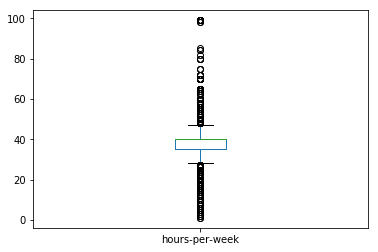

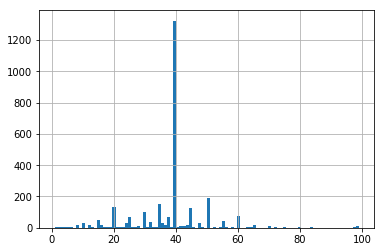

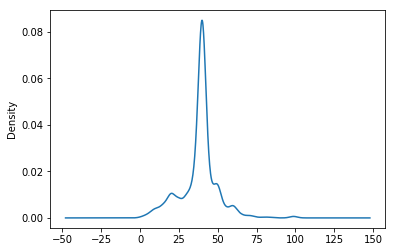

In [61]:
train_data['hours-per-week'].plot.box()
plt.figure()
train_data['hours-per-week'].hist(bins=100)
plt.figure()
train_data['hours-per-week'].plot(kind="density")

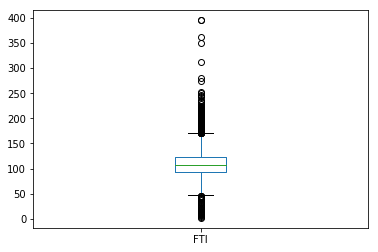

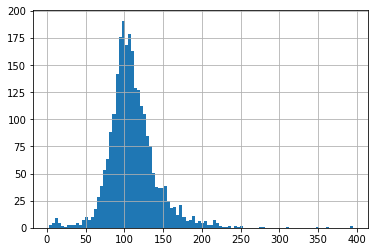

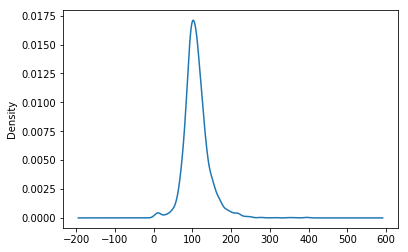

In [16]:
train_data['FTI'].plot.box()
plt.figure()
train_data['FTI'].hist(bins=100)
plt.figure()

In [3]:
train_data.describe(include=['O'])

,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,T3 measured,TT4,FTI measured,TBG measured,TBG,referral source,class,workclass,education,marital-status,occupation,relationship,race,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,sick,T4U measured,psych,query hypothyroid,test,testID
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2451,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2799,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,6,2,2,2,2,2,2,2,2,2,213,2,1,1,5,2800,14,16,7,26,6,5,38,2721,2,3,2,2,2,2,2,2,2,2,2800
top,f,f,f,f,f,f,f,f,f,t,??,t,f,?,other,negative.|2580,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,United-States,1953-02-28,t,F,f,t,f,f,t,f,f,negative,474
freq,2223,2760,2759,2761,2752,2786,2775,2729,2799,2215,99,2505,2800,2800,1632,1,1774,879,1118,449,899,2318,2493,3,2516,1830,2627,2616,2766,2690,2503,2665,2637,2755,1


In [30]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(column, ':')
        for val in train_data[column].unique():
            print ('   |' + val)
        print()

on thyroxine :
   |f
   |F
   |FALSE
   |t
   |TRUE
   |T

query on thyroxine :
   |f
   |t

pregnant :
   |f
   |t

thyroid surgery :
   |f
   |t

I131 treatment :
   |f
   |t

lithium :
   |f
   |t

goitre :
   |f
   |t

tumor :
   |f
   |t

hypopituitary :
   |f
   |t

T3 measured :
   |t
   |f

FTI measured :
   |t
   |f

TBG measured :
   |f

TBG :
   |?

referral source :
   |SVI
   |other
   |SVHC
   |STMW
   |SVHD

workclass :
   | Local-gov
   | Self-emp-not-inc
   |private
   | Self-emp-inc
   | Private
   | ?
   | State-gov
   |federal-gov
   |local-gov
   | Federal-gov
   |self-emp-not-inc
   |?
   |self-emp-inc
   |state-gov

education :
   | Assoc-voc
   | Bachelors
   | Some-college
   | HS-grad
   | 11th
   | Assoc-acdm
   | 12th
   | 10th
   | Masters
   | 9th
   | 7th-8th
   | Preschool
   | Prof-school
   | 1st-4th
   | Doctorate
   | 5th-6th

marital-status :
   | Married-civ-spouse
   | Divorced
   | Widowed
   | Never-married
   | Separated
   | Married-spouse-abs

In [34]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(train_data[column].value_counts())
        print()

f        2223
t         297
F         126
FALSE     121
TRUE       19
T          14
Name: on thyroxine, dtype: int64

f    2760
t      40
Name: query on thyroxine, dtype: int64

f    2759
t      41
Name: pregnant, dtype: int64

f    2761
t      39
Name: thyroid surgery, dtype: int64

f    2752
t      48
Name: I131 treatment, dtype: int64

f    2786
t      14
Name: lithium, dtype: int64

f    2775
t      25
Name: goitre, dtype: int64

f    2729
t      71
Name: tumor, dtype: int64

f    2799
t       1
Name: hypopituitary, dtype: int64

t    2215
f     585
Name: T3 measured, dtype: int64

t    2505
f     295
Name: FTI measured, dtype: int64

f    2800
Name: TBG measured, dtype: int64

?    2800
Name: TBG, dtype: int64

other    1632
SVI       771
SVHC      275
STMW       91
SVHD       31
Name: referral source, dtype: int64

 Private             1774
private               200
 Local-gov            192
 Self-emp-not-inc     160
 ?                    152
 State-gov            113
 Federal-go

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


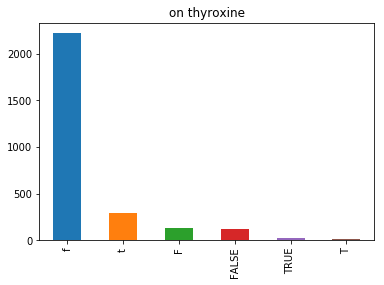

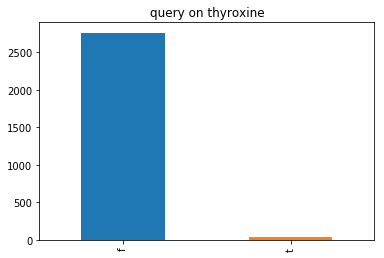

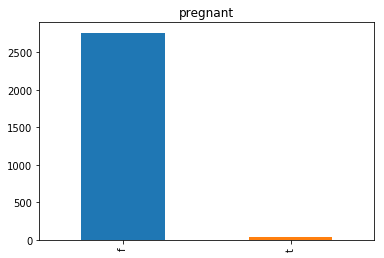

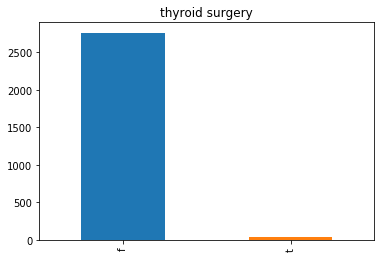

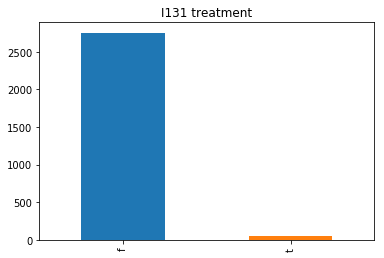

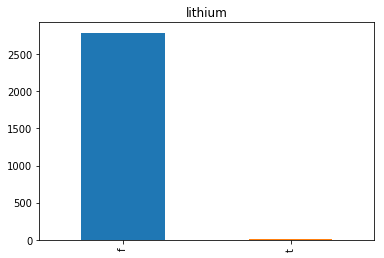

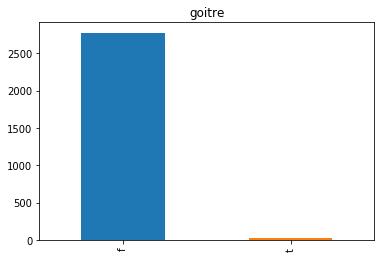

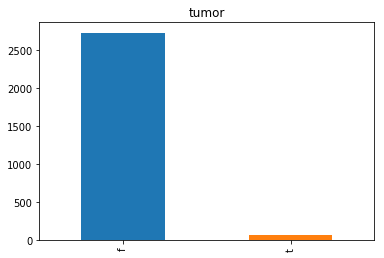

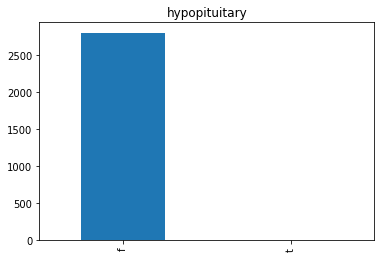

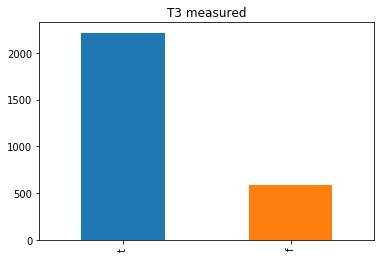

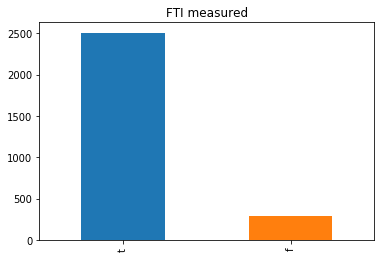

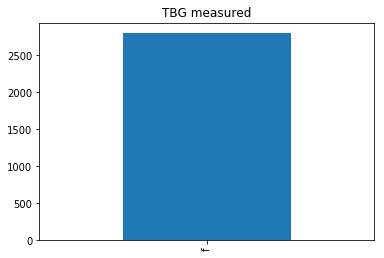

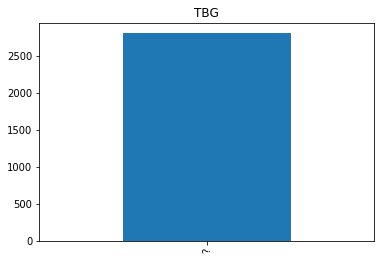

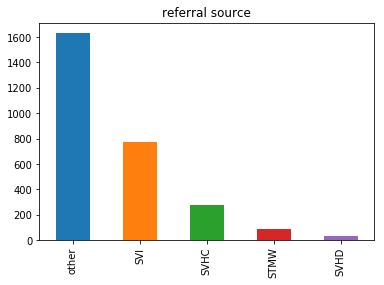

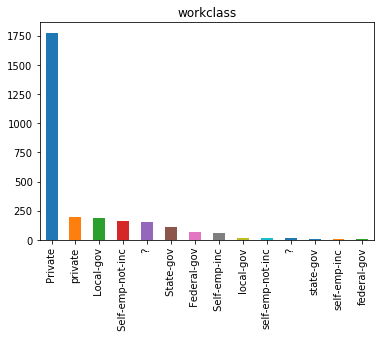

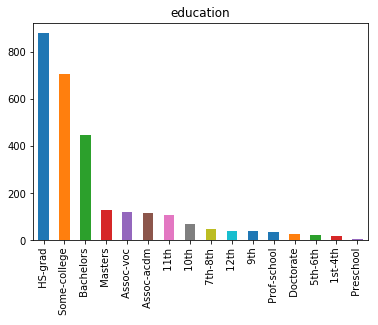

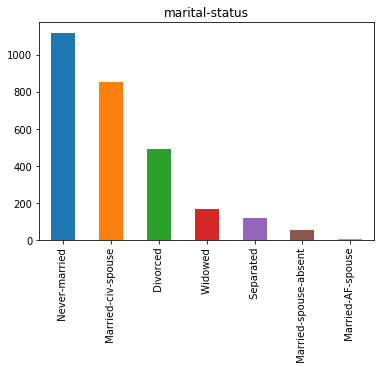

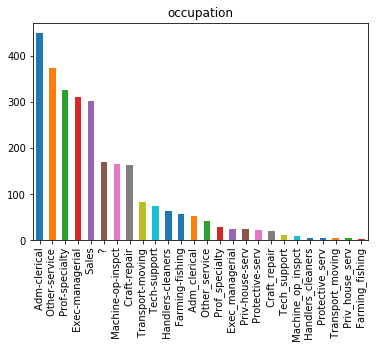

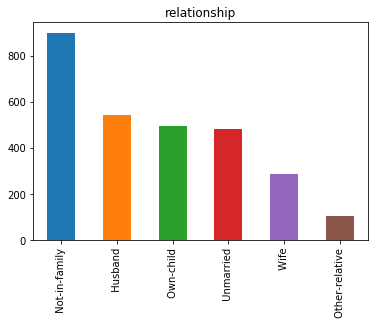

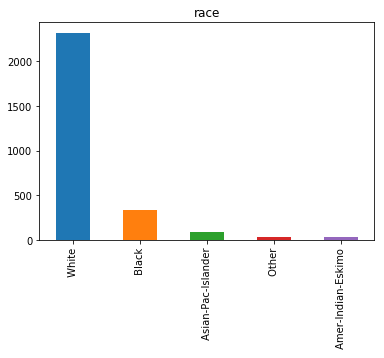

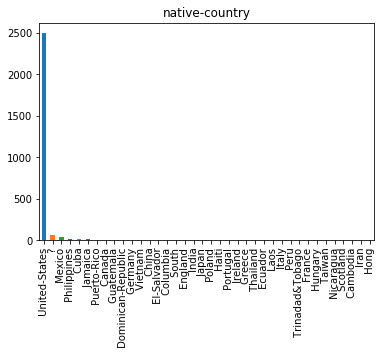

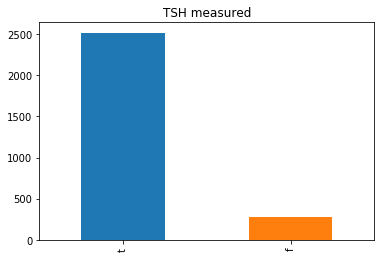

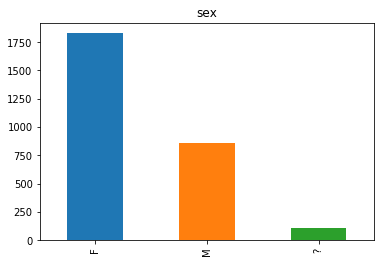

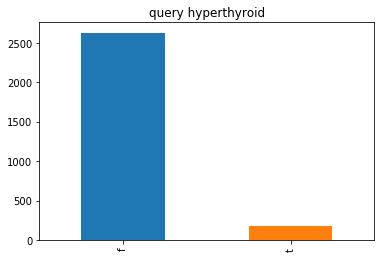

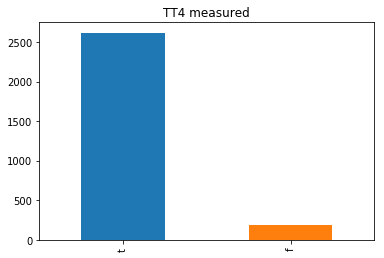

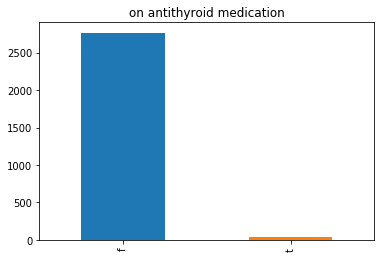

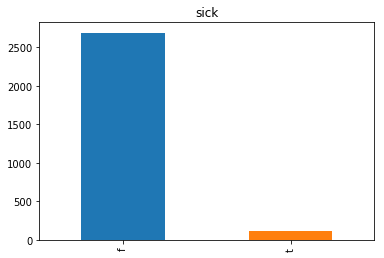

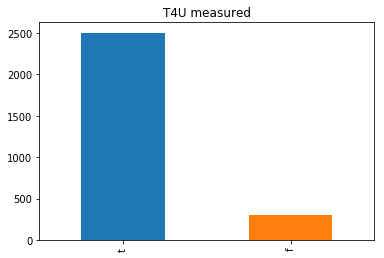

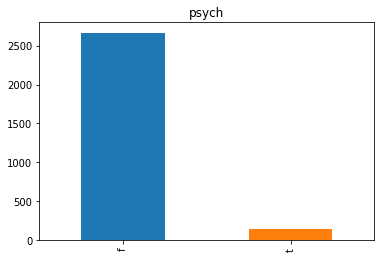

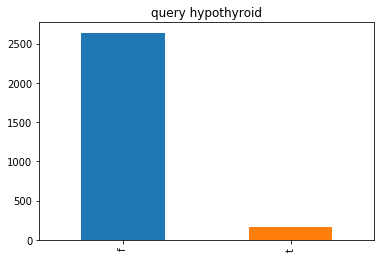

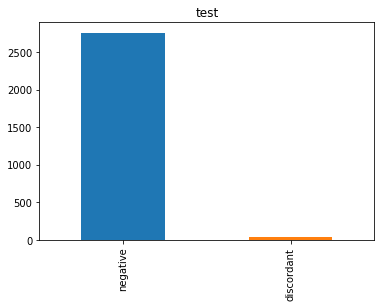

In [31]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        train_data[column].value_counts().plot(kind='bar', title=column)
        plt.figure()

In [86]:
train_data['hypopituitary'].value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

In [60]:
for column in train_data.columns:
    b = train_data[column].isnull()
    print(column, ": ", b[b == True].count())

age :  281
on thyroxine :  0
query on thyroxine :  0
pregnant :  0
thyroid surgery :  0
I131 treatment :  0
lithium :  0
goitre :  0
tumor :  0
hypopituitary :  0
TSH :  284
T3 measured :  0
T3 :  585
TT4 :  349
T4U :  297
FTI measured :  0
TBG measured :  0
TBG :  0
referral source :  0
class :  0
workclass :  0
fnlwgt :  0
education :  0
education-num :  0
marital-status :  0
occupation :  0
relationship :  0
race :  0
capital-gain :  0
capital-loss :  0
hours-per-week :  0
native-country :  0
date_of_birth :  1
TSH measured :  0
sex :  0
query hyperthyroid :  0
TT4 measured :  0
on antithyroid medication :  0
FTI :  0
sick :  0
T4U measured :  0
psych :  0
query hypothyroid :  0


Age-TSH correlation:  -0.06468098608047428


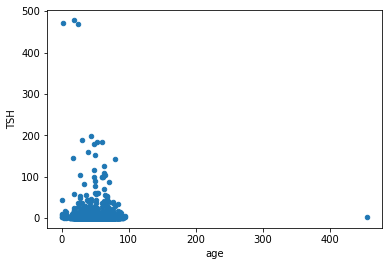

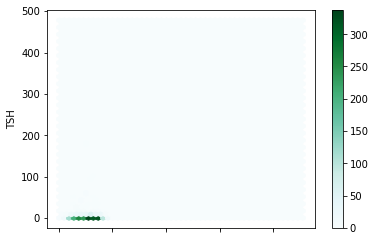

In [76]:
#v tychto bunkach nizsie som len skusal jednotlive techniky
#nieco som cerpal z materialov co ma cviciaci na git-e, nieco je z https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas
print("Age-TSH correlation: ", train_data['age'].corr(train_data['TSH']))
train_data.plot.scatter(x='age', y='TSH')
plt.figure()
train_data.plot.hexbin(x='age', y='TSH', gridsize=50)
plt.figure()

In [96]:
cross = pd.crosstab(index=train_data["sex"], columns=train_data["sick"])
cross

sick,f,t
sex,,
?,108,2
F,1757,73
M,825,35


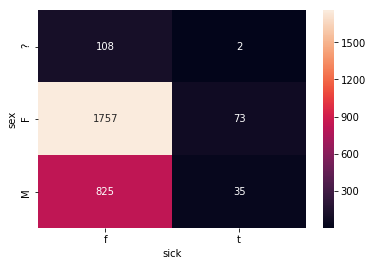

In [94]:
sns.heatmap(cross, annot=True, fmt="d")

In [95]:
crossNorm = pd.crosstab(index=train_data["sex"], columns=train_data["sick"], normalize='index')
crossNorm

sick,f,t
sex,,
?,0.981818,0.018182
F,0.960109,0.039891
M,0.959302,0.040698


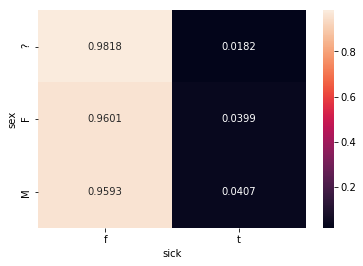

In [93]:
sns.heatmap(crossNorm, annot=True, fmt=".4f")

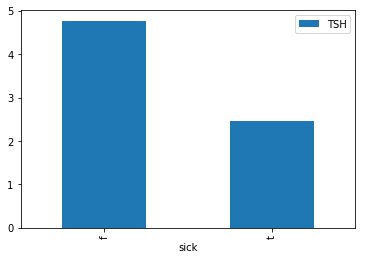

In [22]:
pokemon_stats_by_generation = train_data.groupby('sick').mean()[['TSH']]
pokemon_stats_by_generation.plot.bar(stacked=True)
plt.figure()

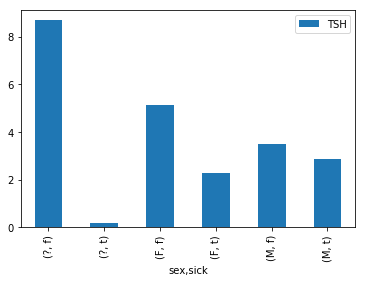

In [21]:
pokemon_stats_by_generation = train_data.groupby(['sex', 'sick']).mean()[['TSH']]
pokemon_stats_by_generation.plot.bar(stacked=True)
plt.figure()

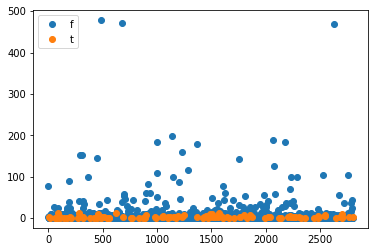

In [60]:
fig, ax = plt.subplots()
for name, group in train_data.groupby('sick'):
    ax.plot(group.TSH, marker='o', linestyle='', label=name)
ax.legend()

plt.show()

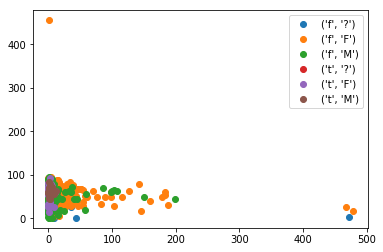

In [59]:
fig, ax = plt.subplots()
for name, group in train_data.groupby(['sick', 'sex']):
    ax.plot(group.TSH, group.age, marker='o', linestyle='', label=name)
ax.legend()

plt.show()

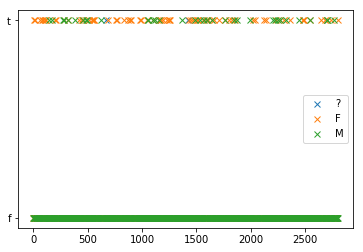

In [5]:
fig, ax = plt.subplots()
for name, group in train_data.groupby('sex'):
    ax.plot(group.sick, marker='x', linestyle='', label=name)
ax.legend()

plt.show()

TODO:
    -najdenie lepsieho nazvu pre dokument
    -bivarietna analyza
    -identifikacia outlierov
    -popis
    -ako odstranime nekonzistencie (popis)
    -ako vyriesime nezname prvky (popis)

Medzi vekom a vyskou TSH nie je korelacia

Age-TSH correlation:  -0.06468098608047428


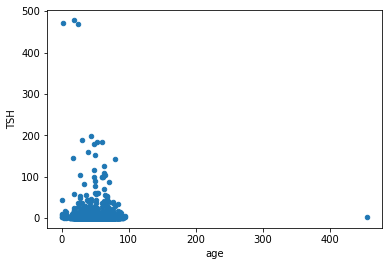

In [6]:
print("Age-TSH correlation: ", train_data['age'].corr(train_data['TSH']))
train_data.plot.scatter(x='age', y='TSH')
plt.figure()
#train_data.plot.hexbin(x='age', y='TSH', gridsize=50)
#plt.figure()

Age-TSH correlation:  -0.16089030633841833


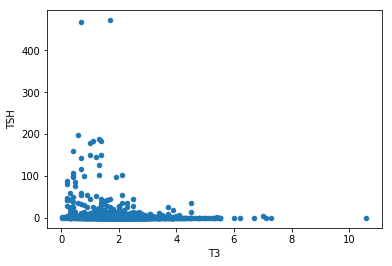

In [15]:
print("T3-TSH correlation: ", train_data['T3'].corr(train_data['TSH']))
train_data.plot.scatter(x='T3', y='TSH')
plt.figure()
#train_data.plot.hexbin(x='age', y='TSH', gridsize=50)
#plt.figure()

Je zrejme, ze nizsie TSH moze byt priznakom choroby.
Uvedena distribucia hodnot naznacuje, ze sa s velkou pravdepodobnostou nejedna o posunutu desatinnu ciarku, pretoze hodnoty TSH by potom mali priblzne rovnaku distribuciu v jednotlivych intervaloch magnitudy 10

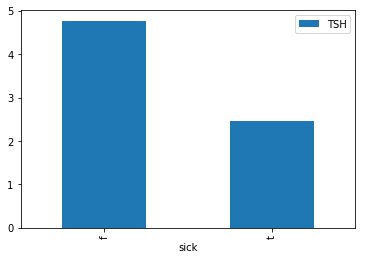

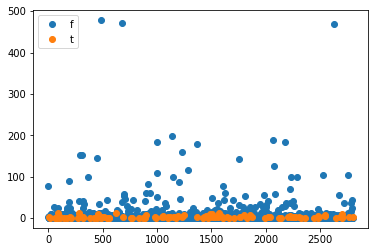

In [8]:
TSH_by_sick = train_data.groupby('sick').mean()[['TSH']]
TSH_by_sick.plot.bar(stacked=True)
plt.figure()

fig, ax = plt.subplots()
for name, group in train_data.groupby('sick'):
    ax.plot(group.TSH, marker='o', linestyle='', label=name)
ax.legend()

plt.show()

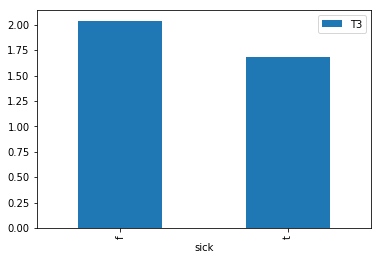

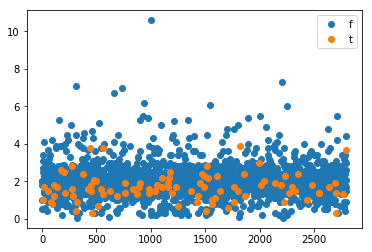

In [12]:
TSH_by_sick = train_data.groupby('sick').mean()[['T3']]
TSH_by_sick.plot.bar(stacked=True)
plt.figure()

fig, ax = plt.subplots()
for name, group in train_data.groupby('sick'):
    ax.plot(group.T3, marker='o', linestyle='', label=name)
ax.legend()

plt.show()

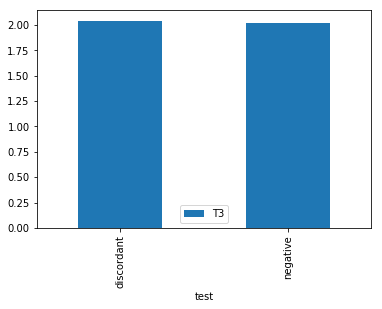

In [16]:
TSH_by_sick = train_data.groupby('test').mean()[['T3']]
TSH_by_sick.plot.bar(stacked=True)
plt.figure()

plt.show()

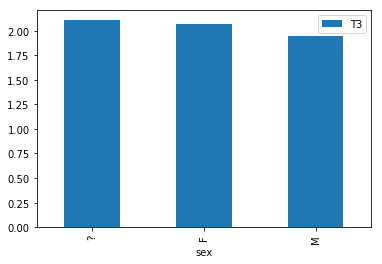

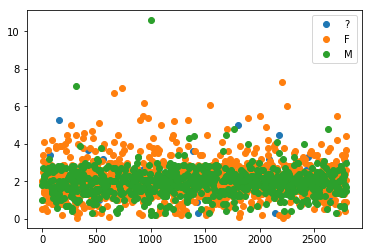

In [13]:
TSH_by_sick = train_data.groupby('sex').mean()[['T3']]
TSH_by_sick.plot.bar(stacked=True)
plt.figure()

In [ ]:
Aj toto pozorovanie potvrdzuje, ze nizsie TSH moze byt priznakom choroby.

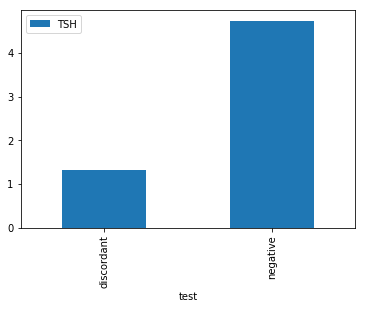

In [10]:
TSH_by_test = train_data.groupby('test').mean()[['TSH']]
TSH_by_test.plot.bar(stacked=True)
plt.figure()

plt.show()

In [ ]:
Avsak nizsie TSH moze byt aj priznakom tehotenstva.

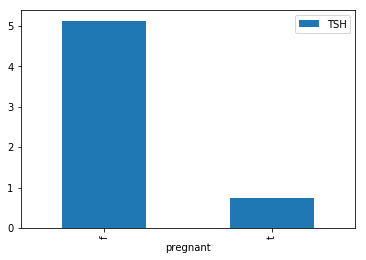

In [28]:
TSH_by_preg = train_data[train_data.sex=='F'].groupby('pregnant').mean()[['TSH']]
TSH_by_preg.plot.bar(stacked=True)
plt.figure()

In [ ]:
Tazko urcit ci TSH je zavisle od pohlavia.

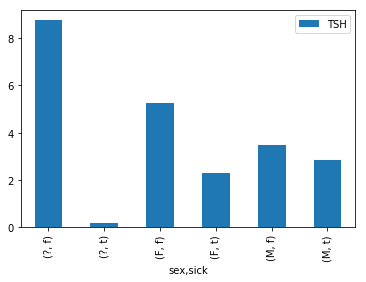

In [45]:
TSH_by_sex = train_data[train_data.pregnant=='f'].groupby(['sex', 'sick']).mean()[['TSH']]
TSH_by_sex.plot.bar(stacked=True)
plt.figure()

In [ ]:
Nepatrne percento zien bolo viac chorych ako muzov.

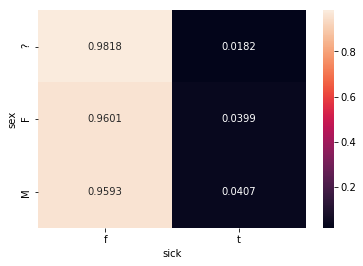

In [24]:
crossNorm = pd.crosstab(index=train_data["sex"], columns=train_data["sick"], normalize='index')
sns.heatmap(crossNorm, annot=True, fmt=".4f")

In [ ]:
Malemu percentu muzov menej vsak vysiel test negativne.

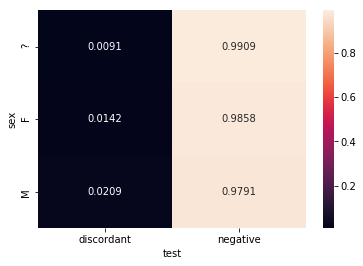

In [16]:
crossNorm = pd.crosstab(index=train_data["sex"], columns=train_data["test"], normalize='index')
sns.heatmap(crossNorm, annot=True, fmt=".4f")

In [7]:
crossNorm = pd.crosstab(index=train_data["goitre"], columns=train_data["tumor"], normalize='index')
crossNorm

tumor,f,t
goitre,,
f,0.974414,0.025586
t,1.000000,0.000000


In [4]:
crossNorm = pd.crosstab(index=train_data["goitre"], columns=train_data["test"], normalize='index')
crossNorm

test,discordant,negative
goitre,,
f,0.016216,0.983784
t,0.000000,1.000000


In [5]:
crossNorm = pd.crosstab(index=train_data["tumor"], columns=train_data["test"], normalize='index')
crossNorm

test,discordant,negative
tumor,,
f,0.01649,0.98351
t,0.00000,1.00000


In [3]:
for column in train_data.columns[train_data.dtypes == np.object]:
    for column2 in train_data.columns[train_data.dtypes == np.object]:
        if train_data[column].unique().size < 10:
            print(pd.crosstab(index=train_data[column], columns=train_data[column2], normalize='index'))
            print()

on thyroxine    F  FALSE    T  TRUE    f    t
on thyroxine                                 
F             1.0    0.0  0.0   0.0  0.0  0.0
FALSE         0.0    1.0  0.0   0.0  0.0  0.0
T             0.0    0.0  1.0   0.0  0.0  0.0
TRUE          0.0    0.0  0.0   1.0  0.0  0.0
f             0.0    0.0  0.0   0.0  1.0  0.0
t             0.0    0.0  0.0   0.0  0.0  1.0

query on thyroxine         f         t
on thyroxine                          
F                   0.992063  0.007937
FALSE               1.000000  0.000000
T                   1.000000  0.000000
TRUE                0.947368  0.052632
f                   0.984705  0.015295
t                   0.986532  0.013468

pregnant             f         t
on thyroxine                    
F             1.000000  0.000000
FALSE         1.000000  0.000000
T             1.000000  0.000000
TRUE          1.000000  0.000000
f             0.984256  0.015744
t             0.979798  0.020202

thyroid surgery         f         t
on thyroxine     

class         discordant.|1030  discordant.|1116  discordant.|1338  \
on thyroxine                                                         
F                      0.00000           0.00000           0.00000   
FALSE                  0.00000           0.00000           0.00000   
T                      0.00000           0.00000           0.00000   
TRUE                   0.00000           0.00000           0.00000   
f                      0.00045           0.00045           0.00045   
t                      0.00000           0.00000           0.00000   

class         discordant.|1412  discordant.|1475  discordant.|1565  \
on thyroxine                                                         
F                      0.00000           0.00000           0.00000   
FALSE                  0.00000           0.00000           0.00000   
T                      0.00000           0.00000           0.00000   
TRUE                   0.00000           0.00000           0.00000   
f                  

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
on thyroxine                                                                
F                 0.00000     0.00000    0.007937    0.000000     0.00000   
FALSE             0.00000     0.00000    0.000000    0.000000     0.00000   
T                 0.00000     0.00000    0.000000    0.000000     0.00000   
TRUE              0.00000     0.00000    0.000000    0.000000     0.00000   
f                 0.00045     0.00045    0.000000    0.000000     0.00045   
t                 0.00000     0.00000    0.000000    0.003378     0.00000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
on thyroxine                                                              
F                 0.00000     0.00000   0.00000     0.00000     0.00000   
FALSE             0.00000     0.00000   0.00000     0.00000     0.00000   
T                 0.00000     0.00000   0.00000     0.00000     0.00000   
TRUE    

testID               1       10     1001      1003      1004     1005  \
on thyroxine                                                            
F             0.000000  0.00000  0.00000  0.007937  0.000000  0.00000   
FALSE         0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
T             0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
TRUE          0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   
f             0.000000  0.00045  0.00045  0.000000  0.000000  0.00045   
t             0.003367  0.00000  0.00000  0.000000  0.003367  0.00000   

testID            1006     1007     1008      101     1010     1012     1013  \
on thyroxine                                                                   
F             0.000000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
FALSE         0.000000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
T             0.000000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
TRUE          0

class               discordant.|1030  discordant.|1116  discordant.|1338  \
query on thyroxine                                                         
f                           0.000362          0.000362          0.000362   
t                           0.000000          0.000000          0.000000   

class               discordant.|1412  discordant.|1475  discordant.|1565  \
query on thyroxine                                                         
f                           0.000362          0.000362          0.000362   
t                           0.000000          0.000000          0.000000   

class               discordant.|1658  discordant.|1916  discordant.|198  \
query on thyroxine                                                        
f                           0.000362          0.000362         0.000362   
t                           0.000000          0.000000         0.000000   

class               discordant.|207  discordant.|2086  discordant.|2091  \
query on thyro

date_of_birth       01/02/1963  01/03/1986  01/05/1951  01/07/1994  \
query on thyroxine                                                   
f                     0.000362    0.000362    0.000362    0.000362   
t                     0.000000    0.000000    0.000000    0.000000   

date_of_birth       01/09/1953  01/09/1975  01/09/1987  02-03-16  02/01/1951  \
query on thyroxine                                                             
f                     0.000362    0.000362    0.000362  0.000362    0.000362   
t                     0.000000    0.000000    0.000000  0.000000    0.000000   

date_of_birth       02/03/1945  02/05/1951  02/10/1973  02/11/1980  \
query on thyroxine                                                   
f                     0.000362    0.000362    0.000362    0.000362   
t                     0.000000    0.000000    0.000000    0.000000   

date_of_birth       02/12/1954  03/01/1978  03/02/1934  03/03/1942  \
query on thyroxine                             

class     discordant.|1030  discordant.|1116  discordant.|1338  \
pregnant                                                         
f                 0.000362          0.000362          0.000362   
t                 0.000000          0.000000          0.000000   

class     discordant.|1412  discordant.|1475  discordant.|1565  \
pregnant                                                         
f                 0.000362          0.000362          0.000362   
t                 0.000000          0.000000          0.000000   

class     discordant.|1658  discordant.|1916  discordant.|198  \
pregnant                                                        
f                 0.000362          0.000362         0.000362   
t                 0.000000          0.000000         0.000000   

class     discordant.|207  discordant.|2086  discordant.|2091  \
pregnant                                                        
f                0.000362          0.000362          0.000362   
t             

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
pregnant                                                                    
f                0.000363    0.000363    0.000363    0.000363    0.000363   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
pregnant                                                                  
f                0.000363    0.000363  0.000363    0.000363    0.000363   
t                0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
pregnant                                                                    
f                0.000363    0.000363    0.000363    0.000363    0.000363   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
preg

referral source      STMW      SVHC      SVHD       SVI     other
thyroid surgery                                                  
f                0.032597  0.099602  0.011228  0.276711  0.579862
t                0.025641  0.000000  0.000000  0.179487  0.794872

class            discordant.|1030  discordant.|1116  discordant.|1338  \
thyroid surgery                                                         
f                        0.000362          0.000362          0.000362   
t                        0.000000          0.000000          0.000000   

class            discordant.|1412  discordant.|1475  discordant.|1565  \
thyroid surgery                                                         
f                        0.000362          0.000362          0.000362   
t                        0.000000          0.000000          0.000000   

class            discordant.|1658  discordant.|1916  discordant.|198  \
thyroid surgery                                                        
f    

date_of_birth    01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
thyroid surgery                                                               
f                  0.000362    0.000362    0.000362    0.000362    0.000362   
t                  0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth    01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
thyroid surgery                                                             
f                  0.000362    0.000362  0.000362    0.000362    0.000362   
t                  0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth    02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
thyroid surgery                                                               
f                  0.000362    0.000362    0.000362    0.000362    0.000362   
t                  0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth    03/02/1934  03/03/1942  03/05/1964  03/0

referral source      STMW      SVHC      SVHD      SVI     other
I131 treatment                                                  
f                0.033067  0.099927  0.011265  0.28016  0.575581
t                0.000000  0.000000  0.000000  0.00000  1.000000

class           discordant.|1030  discordant.|1116  discordant.|1338  \
I131 treatment                                                         
f                       0.000363          0.000363          0.000363   
t                       0.000000          0.000000          0.000000   

class           discordant.|1412  discordant.|1475  discordant.|1565  \
I131 treatment                                                         
f                       0.000363          0.000363          0.000363   
t                       0.000000          0.000000          0.000000   

class           discordant.|1658  discordant.|1916  discordant.|198  \
I131 treatment                                                        
f                  

date_of_birth   01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
I131 treatment                                                               
f                 0.000363    0.000363    0.000363    0.000363    0.000363   
t                 0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth   01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
I131 treatment                                                             
f                 0.000363    0.000363  0.000363    0.000363    0.000363   
t                 0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth   02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
I131 treatment                                                               
f                 0.000363    0.000363    0.000363    0.000363    0.000363   
t                 0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth   03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06

referral source      STMW      SVHC      SVHD       SVI     other
lithium                                                          
f                0.032663  0.095118  0.011127  0.276023  0.585068
t                0.000000  0.714286  0.000000  0.142857  0.142857

class    discordant.|1030  discordant.|1116  discordant.|1338  \
lithium                                                         
f                0.000359          0.000359          0.000359   
t                0.000000          0.000000          0.000000   

class    discordant.|1412  discordant.|1475  discordant.|1565  \
lithium                                                         
f                0.000359          0.000359          0.000359   
t                0.000000          0.000000          0.000000   

class    discordant.|1658  discordant.|1916  discordant.|198  discordant.|207  \
lithium                                                                         
f                0.000359          0.000359        

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
lithium                                                                     
f                0.000359    0.000359    0.000359    0.000359    0.000359   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
lithium                                                                   
f                0.000359    0.000359  0.000359    0.000359    0.000359   
t                0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
lithium                                                                     
f                0.000359    0.000359    0.000359    0.000359    0.000359   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
lith

referral source      STMW      SVHC      SVHD       SVI     other
goitre                                                           
f                0.032793  0.098739  0.011171  0.274234  0.583063
t                0.000000  0.040000  0.000000  0.400000  0.560000

class   discordant.|1030  discordant.|1116  discordant.|1338  \
goitre                                                         
f                0.00036           0.00036           0.00036   
t                0.00000           0.00000           0.00000   

class   discordant.|1412  discordant.|1475  discordant.|1565  \
goitre                                                         
f                0.00036           0.00036           0.00036   
t                0.00000           0.00000           0.00000   

class   discordant.|1658  discordant.|1916  discordant.|198  discordant.|207  \
goitre                                                                         
f                0.00036           0.00036          0.00036  

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
goitre                                                                      
f                 0.00036     0.00036     0.00036     0.00036     0.00036   
t                 0.00000     0.00000     0.00000     0.00000     0.00000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
goitre                                                                    
f                 0.00036     0.00036   0.00036     0.00036     0.00036   
t                 0.00000     0.00000   0.00000     0.00000     0.00000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
goitre                                                                      
f                 0.00036     0.00036     0.00036     0.00036     0.00036   
t                 0.00000     0.00000     0.00000     0.00000     0.00000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
goit

referral source      STMW      SVHC      SVHD       SVI     other
tumor                                                            
f                0.030781  0.100403  0.011359  0.277025  0.580432
t                0.098592  0.014085  0.000000  0.211268  0.676056

class  discordant.|1030  discordant.|1116  discordant.|1338  discordant.|1412  \
tumor                                                                           
f              0.000366          0.000366          0.000366          0.000366   
t              0.000000          0.000000          0.000000          0.000000   

class  discordant.|1475  discordant.|1565  discordant.|1658  discordant.|1916  \
tumor                                                                           
f              0.000366          0.000366          0.000366          0.000366   
t              0.000000          0.000000          0.000000          0.000000   

class  discordant.|198  discordant.|207  discordant.|2086  discordant.|2091  \
tumor 

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
tumor                                                                       
f                0.000367    0.000367    0.000367    0.000367    0.000367   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
tumor                                                                     
f                0.000367    0.000367  0.000367    0.000367    0.000367   
t                0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
tumor                                                                       
f                0.000000    0.000367    0.000367    0.000367    0.000367   
t                0.014085    0.000000    0.000000    0.000000    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
tumo

class          discordant.|1030  discordant.|1116  discordant.|1338  \
hypopituitary                                                         
f                      0.000357          0.000357          0.000357   
t                      0.000000          0.000000          0.000000   

class          discordant.|1412  discordant.|1475  discordant.|1565  \
hypopituitary                                                         
f                      0.000357          0.000357          0.000357   
t                      0.000000          0.000000          0.000000   

class          discordant.|1658  discordant.|1916  discordant.|198  \
hypopituitary                                                        
f                      0.000357          0.000357         0.000357   
t                      0.000000          0.000000         0.000000   

class          discordant.|207  discordant.|2086  discordant.|2091  \
hypopituitary                                                        
f        

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
hypopituitary                                                               
f                0.000357    0.000357    0.000357    0.000357    0.000357   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
hypopituitary                                                             
f                0.000357    0.000357  0.000357    0.000357    0.000357   
t                0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
hypopituitary                                                               
f                0.000357    0.000357    0.000357    0.000357    0.000357   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
hypo

class        discordant.|1030  discordant.|1116  discordant.|1338  \
T3 measured                                                         
f                    0.000000          0.000000          0.000000   
t                    0.000451          0.000451          0.000451   

class        discordant.|1412  discordant.|1475  discordant.|1565  \
T3 measured                                                         
f                    0.000000          0.000000          0.000000   
t                    0.000451          0.000451          0.000451   

class        discordant.|1658  discordant.|1916  discordant.|198  \
T3 measured                                                        
f                    0.000000          0.000000         0.000000   
t                    0.000451          0.000451         0.000451   

class        discordant.|207  discordant.|2086  discordant.|2091  \
T3 measured                                                        
f                   0.000000         

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
T3 measured                                                                 
f                0.000000    0.000000    0.000000    0.001709    0.001709   
t                0.000452    0.000452    0.000452    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
T3 measured                                                               
f                0.000000    0.000000  0.000000    0.000000    0.000000   
t                0.000452    0.000452  0.000452    0.000452    0.000452   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
T3 measured                                                                 
f                0.000000    0.000000    0.000000    0.000000    0.001709   
t                0.000452    0.000452    0.000452    0.000452    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
T3 m

referral source      STMW      SVHC      SVHD       SVI     other
FTI measured                                                     
f                0.006780  0.013559  0.003390  0.071186  0.905085
t                0.035529  0.108184  0.011976  0.299401  0.544910

class         discordant.|1030  discordant.|1116  discordant.|1338  \
FTI measured                                                         
f                     0.000000          0.000000          0.000000   
t                     0.000399          0.000399          0.000399   

class         discordant.|1412  discordant.|1475  discordant.|1565  \
FTI measured                                                         
f                     0.000000          0.000000          0.000000   
t                     0.000399          0.000399          0.000399   

class         discordant.|1658  discordant.|1916  discordant.|198  \
FTI measured                                                        
f                     0.000000     

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
FTI measured                                                                
f                0.000000    0.000000    0.000000     0.00339     0.00339   
t                0.000399    0.000399    0.000399     0.00000     0.00000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
FTI measured                                                              
f                0.000000    0.000000  0.000000    0.000000    0.000000   
t                0.000399    0.000399  0.000399    0.000399    0.000399   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
FTI measured                                                                
f                0.000000    0.000000    0.000000    0.000000    0.000000   
t                0.000399    0.000399    0.000399    0.000399    0.000399   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
FTI 

education         10th      11th      12th   1st-4th   5th-6th   7th-8th  \
TBG measured                                                               
f             0.024286  0.037857  0.014286  0.005714  0.007143  0.016786   

education          9th   Assoc-acdm   Assoc-voc   Bachelors   Doctorate  \
TBG measured                                                              
f             0.014286     0.041429      0.0425    0.159643        0.01   

education      HS-grad   Masters   Preschool   Prof-school   Some-college  
TBG measured                                                               
f             0.313929  0.045714    0.001071      0.012857         0.2525  

marital-status   Divorced   Married-AF-spouse   Married-civ-spouse  \
TBG measured                                                         
f                0.174643            0.000714             0.304643   

marital-status   Married-spouse-absent   Never-married   Separated   Widowed  
TBG measured              

test          discordant  negative
TBG measured                      
f               0.016071  0.983929

testID               1        10      1001      1003      1004      1005  \
TBG measured                                                               
f             0.000357  0.000357  0.000357  0.000357  0.000357  0.000357   

testID            1006      1007      1008       101      1010      1012  \
TBG measured                                                               
f             0.000357  0.000357  0.000357  0.000357  0.000357  0.000357   

testID            1013      1016      1017      1018      1019       102  \
TBG measured                                                               
f             0.000357  0.000357  0.000357  0.000357  0.000357  0.000357   

testID            1020      1021      1022      1023      1024      1026  \
TBG measured                                                               
f             0.000357  0.000357  0.000357  0.000357  0

psych         f         t
TBG                      
?      0.951786  0.048214

query hypothyroid         f         t
TBG                                  
?                  0.941786  0.058214

test  discordant  negative
TBG                       
?       0.016071  0.983929

testID         1        10      1001      1003      1004      1005      1006  \
TBG                                                                            
?       0.000357  0.000357  0.000357  0.000357  0.000357  0.000357  0.000357   

testID      1007      1008       101      1010      1012      1013      1016  \
TBG                                                                            
?       0.000357  0.000357  0.000357  0.000357  0.000357  0.000357  0.000357   

testID      1017      1018      1019       102      1020      1021      1022  \
TBG                                                                            
?       0.000357  0.000357  0.000357  0.000357  0.000357  0.000357  0.000357   

t

class            discordant.|1030  discordant.|1116  discordant.|1338  \
referral source                                                         
STMW                     0.000000          0.000000          0.000000   
SVHC                     0.000000          0.000000          0.000000   
SVHD                     0.000000          0.000000          0.000000   
SVI                      0.001297          0.000000          0.000000   
other                    0.000000          0.000613          0.000613   

class            discordant.|1412  discordant.|1475  discordant.|1565  \
referral source                                                         
STMW                     0.000000          0.000000          0.000000   
SVHC                     0.000000          0.000000          0.000000   
SVHD                     0.000000          0.000000          0.000000   
SVI                      0.000000          0.001297          0.000000   
other                    0.000613          0.00000

date_of_birth    01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
referral source                                                               
STMW               0.000000    0.000000    0.000000    0.000000    0.000000   
SVHC               0.000000    0.000000    0.000000    0.000000    0.000000   
SVHD               0.000000    0.000000    0.000000    0.000000    0.000000   
SVI                0.000000    0.001297    0.001297    0.000000    0.000000   
other              0.000613    0.000000    0.000000    0.000613    0.000613   

date_of_birth    01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
referral source                                                             
STMW               0.000000    0.000000  0.000000    0.000000    0.000000   
SVHC               0.000000    0.000000  0.000000    0.000000    0.000000   
SVHD               0.000000    0.000000  0.000000    0.000000    0.000000   
SVI                0.001297    0.001297  0.000000    0.001297

TT4                         10.0     100.0     101.0     102.0     103.0  \
marital-status                                                             
 Divorced               0.000000  0.011682  0.023364  0.021028  0.014019   
 Married-AF-spouse      0.000000  0.000000  0.000000  0.000000  0.000000   
 Married-civ-spouse     0.001326  0.015915  0.018568  0.017241  0.019894   
 Married-spouse-absent  0.021739  0.000000  0.021739  0.000000  0.021739   
 Never-married          0.001034  0.009307  0.026887  0.010341  0.018614   
 Separated              0.000000  0.009804  0.019608  0.000000  0.009804   
 Widowed                0.000000  0.000000  0.032895  0.006579  0.006579   

TT4                        104.0     105.0     106.0     107.0     108.0  \
marital-status                                                             
 Divorced               0.016355  0.023364  0.021028  0.007009  0.009346   
 Married-AF-spouse      0.000000  0.000000  0.000000  0.000000  0.000000   
 Married-ci

class                   discordant.|1030  discordant.|1116  discordant.|1338  \
marital-status                                                                 
 Divorced                       0.002045          0.000000          0.000000   
 Married-AF-spouse              0.000000          0.000000          0.000000   
 Married-civ-spouse             0.000000          0.000000          0.001172   
 Married-spouse-absent          0.000000          0.000000          0.000000   
 Never-married                  0.000000          0.000894          0.000000   
 Separated                      0.000000          0.000000          0.000000   
 Widowed                        0.000000          0.000000          0.000000   

class                   discordant.|1412  discordant.|1475  discordant.|1565  \
marital-status                                                                 
 Divorced                       0.000000          0.000000          0.000000   
 Married-AF-spouse              0.00000

date_of_birth           01/02/1963  01/03/1986  01/05/1951  01/07/1994  \
marital-status                                                           
 Divorced                 0.000000    0.000000    0.002045    0.000000   
 Married-AF-spouse        0.000000    0.000000    0.000000    0.000000   
 Married-civ-spouse       0.000000    0.001172    0.000000    0.000000   
 Married-spouse-absent    0.018868    0.000000    0.000000    0.000000   
 Never-married            0.000000    0.000000    0.000000    0.000894   
 Separated                0.000000    0.000000    0.000000    0.000000   
 Widowed                  0.000000    0.000000    0.000000    0.000000   

date_of_birth           01/09/1953  01/09/1975  01/09/1987  02-03-16  \
marital-status                                                         
 Divorced                 0.000000    0.000000    0.000000  0.000000   
 Married-AF-spouse        0.000000    0.000000    0.000000  0.000000   
 Married-civ-spouse       0.000000    0.00000

testID                         1        10      1001      1003      1004  \
marital-status                                                             
 Divorced               0.000000  0.000000  0.000000  0.000000  0.002045   
 Married-AF-spouse      0.000000  0.000000  0.000000  0.000000  0.000000   
 Married-civ-spouse     0.000000  0.000000  0.001172  0.000000  0.000000   
 Married-spouse-absent  0.000000  0.000000  0.000000  0.000000  0.000000   
 Never-married          0.000000  0.000894  0.000000  0.000894  0.000000   
 Separated              0.000000  0.000000  0.000000  0.000000  0.000000   
 Widowed                0.005988  0.000000  0.000000  0.000000  0.000000   

testID                      1005      1006      1007      1008       101  \
marital-status                                                             
 Divorced               0.000000  0.000000  0.000000  0.000000  0.000000   
 Married-AF-spouse      0.000000  0.000000  0.000000  0.000000  0.000000   
 Married-ci

TBG                ?
relationship        
 Husband         1.0
 Not-in-family   1.0
 Other-relative  1.0
 Own-child       1.0
 Unmarried       1.0
 Wife            1.0

referral source      STMW      SVHC      SVHD       SVI     other
relationship                                                     
 Husband         0.007394  0.168207  0.011091  0.338262  0.475046
 Not-in-family   0.037820  0.074527  0.014461  0.283648  0.589544
 Other-relative  0.038835  0.097087  0.000000  0.281553  0.582524
 Own-child       0.046748  0.095528  0.008130  0.258130  0.591463
 Unmarried       0.033264  0.083160  0.010395  0.230769  0.642412
 Wife            0.035211  0.070423  0.010563  0.232394  0.651408

class            discordant.|1030  discordant.|1116  discordant.|1338  \
relationship                                                            
 Husband                 0.000000          0.000000          0.001848   
 Not-in-family           0.000000          0.001112          0.000000   
 Other-rel

date_of_birth    01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
relationship                                                                  
 Husband           0.000000    0.001848    0.000000    0.000000    0.000000   
 Not-in-family     0.001112    0.000000    0.001112    0.000000    0.000000   
 Other-relative    0.000000    0.000000    0.000000    0.000000    0.000000   
 Own-child         0.000000    0.000000    0.000000    0.000000    0.002033   
 Unmarried         0.000000    0.000000    0.000000    0.002083    0.000000   
 Wife              0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth    01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
relationship                                                                
 Husband           0.000000    0.000000  0.000000    0.000000    0.000000   
 Not-in-family     0.000000    0.001112  0.000000    0.000000    0.001112   
 Other-relative    0.009709    0.000000  0.000000    0.0000

testID                  1        10      1001      1003      1004      1005  \
relationship                                                                  
 Husband         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 Not-in-family   0.000000  0.000000  0.000000  0.001112  0.000000  0.001112   
 Other-relative  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 Own-child       0.000000  0.002033  0.000000  0.000000  0.000000  0.000000   
 Unmarried       0.002079  0.000000  0.000000  0.000000  0.002079  0.000000   
 Wife            0.000000  0.000000  0.003521  0.000000  0.000000  0.000000   

testID               1006      1007      1008       101      1010      1012  \
relationship                                                                  
 Husband         0.000000  0.001848  0.001848  0.000000  0.000000  0.000000   
 Not-in-family   0.000000  0.000000  0.000000  0.000000  0.000000  0.001112   
 Other-relative  0.009709  0.000000  0.000000  0.00

class                discordant.|1030  discordant.|1116  discordant.|1338  \
race                                                                        
 Amer-Indian-Eskimo          0.000000          0.000000          0.000000   
 Asian-Pac-Islander          0.000000          0.000000          0.000000   
 Black                       0.000000          0.000000          0.000000   
 Other                       0.000000          0.000000          0.000000   
 White                       0.000431          0.000431          0.000431   

class                discordant.|1412  discordant.|1475  discordant.|1565  \
race                                                                        
 Amer-Indian-Eskimo          0.000000          0.000000          0.000000   
 Asian-Pac-Islander          0.000000          0.000000          0.000000   
 Black                       0.000000          0.000000          0.000000   
 Other                       0.000000          0.000000          0.000000  

date_of_birth        01/02/1963  01/03/1986  01/05/1951  01/07/1994  \
race                                                                  
 Amer-Indian-Eskimo    0.000000    0.000000    0.000000    0.000000   
 Asian-Pac-Islander    0.000000    0.000000    0.000000    0.000000   
 Black                 0.000000    0.000000    0.000000    0.000000   
 Other                 0.030303    0.000000    0.000000    0.000000   
 White                 0.000000    0.000431    0.000431    0.000431   

date_of_birth        01/09/1953  01/09/1975  01/09/1987  02-03-16  02/01/1951  \
race                                                                            
 Amer-Indian-Eskimo    0.000000     0.00000    0.000000   0.00000    0.000000   
 Asian-Pac-Islander    0.000000     0.00000    0.000000   0.00000    0.000000   
 Black                 0.000000     0.00304    0.000000   0.00304    0.000000   
 Other                 0.000000     0.00000    0.000000   0.00000    0.000000   
 White          

testID                     1        10     1001      1003      1004      1005  \
race                                                                            
 Amer-Indian-Eskimo  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000   
 Asian-Pac-Islander  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000   
 Black               0.00303  0.000000  0.00303  0.000000  0.000000  0.000000   
 Other               0.00000  0.000000  0.00000  0.000000  0.000000  0.000000   
 White               0.00000  0.000431  0.00000  0.000431  0.000431  0.000431   

testID                   1006      1007      1008       101      1010  \
race                                                                    
 Amer-Indian-Eskimo  0.000000  0.000000  0.000000  0.000000  0.000000   
 Asian-Pac-Islander  0.010989  0.000000  0.000000  0.000000  0.000000   
 Black               0.000000  0.000000  0.000000  0.000000  0.000000   
 Other               0.000000  0.000000  0.000000  0.000000  0.0000

TBG             ?
TSH measured     
f             1.0
t             1.0

referral source      STMW      SVHC      SVHD       SVI     other
TSH measured                                                     
f                0.003521  0.003521  0.000000  0.017606  0.975352
t                0.035771  0.108903  0.012321  0.304452  0.538553

class         discordant.|1030  discordant.|1116  discordant.|1338  \
TSH measured                                                         
f                     0.000000          0.000000          0.000000   
t                     0.000397          0.000397          0.000397   

class         discordant.|1412  discordant.|1475  discordant.|1565  \
TSH measured                                                         
f                     0.000000          0.000000          0.000000   
t                     0.000397          0.000397          0.000397   

class         discordant.|1658  discordant.|1916  discordant.|198  \
TSH measured                   

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
TSH measured                                                                
f                0.000000    0.000000    0.000000    0.003521    0.003521   
t                0.000398    0.000398    0.000398    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
TSH measured                                                              
f                0.000000    0.000000  0.000000    0.000000    0.000000   
t                0.000398    0.000398  0.000398    0.000398    0.000398   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
TSH measured                                                                
f                0.000000    0.000000    0.000000    0.000000    0.000000   
t                0.000398    0.000398    0.000398    0.000398    0.000398   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
TSH 

TBG    ?
sex     
?    1.0
F    1.0
M    1.0

referral source      STMW      SVHC      SVHD       SVI     other
sex                                                              
?                0.118182  0.036364  0.009091  0.218182  0.618182
F                0.042077  0.068852  0.012022  0.243169  0.633880
M                0.001163  0.168605  0.009302  0.351163  0.469767

class  discordant.|1030  discordant.|1116  discordant.|1338  discordant.|1412  \
sex                                                                             
?              0.000000          0.000000          0.000000          0.000000   
F              0.000546          0.000000          0.000000          0.000000   
M              0.000000          0.001163          0.001163          0.001163   

class  discordant.|1475  discordant.|1565  discordant.|1658  discordant.|1916  \
sex                                                                             
?              0.000000          0.000000          0.00

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
sex                                                                         
?                0.000000    0.000000    0.000000    0.000000    0.000000   
F                0.000547    0.000000    0.000547    0.000547    0.000547   
M                0.000000    0.001163    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
sex                                                                       
?                0.000000    0.000000  0.000000    0.000000    0.000000   
F                0.000547    0.000547  0.000547    0.000000    0.000547   
M                0.000000    0.000000  0.000000    0.001163    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
sex                                                                         
?                0.000000    0.000000    0.000000    0.000000    0.009091   
F      

class               discordant.|1030  discordant.|1116  discordant.|1338  \
query hyperthyroid                                                         
f                           0.000381          0.000381          0.000381   
t                           0.000000          0.000000          0.000000   

class               discordant.|1412  discordant.|1475  discordant.|1565  \
query hyperthyroid                                                         
f                           0.000381          0.000381          0.000381   
t                           0.000000          0.000000          0.000000   

class               discordant.|1658  discordant.|1916  discordant.|198  \
query hyperthyroid                                                        
f                           0.000381          0.000381          0.00000   
t                           0.000000          0.000000          0.00578   

class               discordant.|207  discordant.|2086  discordant.|2091  \
query hyperthy

date_of_birth       01/02/1963  01/03/1986  01/05/1951  01/07/1994  \
query hyperthyroid                                                   
f                      0.00000    0.000381    0.000381    0.000381   
t                      0.00578    0.000000    0.000000    0.000000   

date_of_birth       01/09/1953  01/09/1975  01/09/1987  02-03-16  02/01/1951  \
query hyperthyroid                                                             
f                     0.000381    0.000381    0.000381  0.000381    0.000381   
t                     0.000000    0.000000    0.000000  0.000000    0.000000   

date_of_birth       02/03/1945  02/05/1951  02/10/1973  02/11/1980  \
query hyperthyroid                                                   
f                     0.000381    0.000381    0.000381    0.000381   
t                     0.000000    0.000000    0.000000    0.000000   

date_of_birth       02/12/1954  03/01/1978  03/02/1934  03/03/1942  \
query hyperthyroid                             

referral source      STMW      SVHC      SVHD       SVI     other
TT4 measured                                                     
f                0.010870  0.005435  0.005435  0.021739  0.956522
t                0.034021  0.104740  0.011468  0.293196  0.556575

class         discordant.|1030  discordant.|1116  discordant.|1338  \
TT4 measured                                                         
f                     0.000000          0.000000          0.000000   
t                     0.000382          0.000382          0.000382   

class         discordant.|1412  discordant.|1475  discordant.|1565  \
TT4 measured                                                         
f                     0.000000          0.000000          0.000000   
t                     0.000382          0.000382          0.000382   

class         discordant.|1658  discordant.|1916  discordant.|198  \
TT4 measured                                                        
f                     0.000000     

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
TT4 measured                                                                
f                0.000000    0.000000    0.000000    0.005435    0.005435   
t                0.000382    0.000382    0.000382    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
TT4 measured                                                              
f                0.000000    0.000000  0.000000    0.000000    0.000000   
t                0.000382    0.000382  0.000382    0.000382    0.000382   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
TT4 measured                                                                
f                0.000000    0.000000    0.000000    0.000000    0.000000   
t                0.000382    0.000382    0.000382    0.000382    0.000382   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
TT4 

FTI measured                      f         t
on antithyroid medication                    
f                          0.104121  0.895879
t                          0.205882  0.794118

TBG measured                 f
on antithyroid medication     
f                          1.0
t                          1.0

TBG                          ?
on antithyroid medication     
f                          1.0
t                          1.0

referral source                STMW      SVHC      SVHD       SVI     other
on antithyroid medication                                                  
f                          0.031453  0.099422  0.011208  0.278742  0.579176
t                          0.117647  0.000000  0.000000  0.000000  0.882353

class                      discordant.|1030  discordant.|1116  \
on antithyroid medication                                       
f                                  0.000362          0.000362   
t                                  0.000000          0.000000   


date_of_birth              01/02/1963  01/03/1986  01/05/1951  01/07/1994  \
on antithyroid medication                                                   
f                            0.000362    0.000362    0.000362    0.000362   
t                            0.000000    0.000000    0.000000    0.000000   

date_of_birth              01/09/1953  01/09/1975  01/09/1987  02-03-16  \
on antithyroid medication                                                 
f                            0.000362    0.000362    0.000362  0.000362   
t                            0.000000    0.000000    0.000000  0.000000   

date_of_birth              02/01/1951  02/03/1945  02/05/1951  02/10/1973  \
on antithyroid medication                                                   
f                            0.000362    0.000362    0.000362    0.000362   
t                            0.000000    0.000000    0.000000    0.000000   

date_of_birth              02/11/1980  02/12/1954  03/01/1978  03/02/1934  \
on a

TBG     ?
sick     
f     1.0
t     1.0

referral source      STMW      SVHC      SVHD       SVI     other
sick                                                             
f                0.033829  0.101859  0.005204  0.268030  0.591078
t                0.000000  0.009091  0.154545  0.454545  0.381818

class  discordant.|1030  discordant.|1116  discordant.|1338  discordant.|1412  \
sick                                                                            
f              0.000372          0.000372          0.000372          0.000372   
t              0.000000          0.000000          0.000000          0.000000   

class  discordant.|1475  discordant.|1565  discordant.|1658  discordant.|1916  \
sick                                                                            
f              0.000372          0.000372          0.000372          0.000372   
t              0.000000          0.000000          0.000000          0.000000   

class  discordant.|198  discordant.|207  dis

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
sick                                                                        
f                0.000372    0.000372    0.000372    0.000372    0.000372   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
sick                                                                      
f                0.000372    0.000372  0.000372    0.000372    0.000372   
t                0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
sick                                                                        
f                0.000372    0.000372    0.000372    0.000000    0.000372   
t                0.000000    0.000000    0.000000    0.009091    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
sick

class         discordant.|1030  discordant.|1116  discordant.|1338  \
T4U measured                                                         
f                       0.0000            0.0000            0.0000   
t                       0.0004            0.0004            0.0004   

class         discordant.|1412  discordant.|1475  discordant.|1565  \
T4U measured                                                         
f                       0.0000            0.0000            0.0000   
t                       0.0004            0.0004            0.0004   

class         discordant.|1658  discordant.|1916  discordant.|198  \
T4U measured                                                        
f                       0.0000            0.0000           0.0000   
t                       0.0004            0.0004           0.0004   

class         discordant.|207  discordant.|2086  discordant.|2091  \
T4U measured                                                        
f                      

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
T4U measured                                                                
f                  0.0000      0.0000      0.0000    0.003367    0.003367   
t                  0.0004      0.0004      0.0004    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
T4U measured                                                              
f                  0.0000      0.0000    0.0000      0.0000      0.0000   
t                  0.0004      0.0004    0.0004      0.0004      0.0004   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
T4U measured                                                                
f                  0.0000      0.0000      0.0000      0.0000      0.0000   
t                  0.0004      0.0004      0.0004      0.0004      0.0004   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
T4U 

referral source      STMW      SVHC      SVHD       SVI     other
psych                                                            
f                0.034146  0.060788  0.011632  0.285929  0.607505
t                0.000000  0.837037  0.000000  0.066667  0.096296

class  discordant.|1030  discordant.|1116  discordant.|1338  discordant.|1412  \
psych                                                                           
f              0.000375          0.000375          0.000375          0.000375   
t              0.000000          0.000000          0.000000          0.000000   

class  discordant.|1475  discordant.|1565  discordant.|1658  discordant.|1916  \
psych                                                                           
f              0.000375          0.000375          0.000000          0.000375   
t              0.000000          0.000000          0.007407          0.000000   

class  discordant.|198  discordant.|207  discordant.|2086  discordant.|2091  \
psych 

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
psych                                                                       
f                0.000375    0.000375    0.000375    0.000375    0.000375   
t                0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
psych                                                                     
f                0.000375    0.000375  0.000375    0.000375    0.000375   
t                0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
psych                                                                       
f                0.000000    0.000000    0.000375    0.000375    0.000375   
t                0.007407    0.007407    0.000000    0.000000    0.000000   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
psyc

referral source        STMW     SVHC      SVHD       SVI     other
query hypothyroid                                                 
f                  0.032234  0.10201  0.010618  0.277588  0.577550
t                  0.036810  0.03681  0.018405  0.239264  0.668712

class              discordant.|1030  discordant.|1116  discordant.|1338  \
query hypothyroid                                                         
f                          0.000379          0.000379          0.000379   
t                          0.000000          0.000000          0.000000   

class              discordant.|1412  discordant.|1475  discordant.|1565  \
query hypothyroid                                                         
f                          0.000379          0.000379          0.000379   
t                          0.000000          0.000000          0.000000   

class              discordant.|1658  discordant.|1916  discordant.|198  \
query hypothyroid                                      

date_of_birth      01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
query hypothyroid                                                               
f                    0.000379    0.000379    0.000000    0.000379    0.000379   
t                    0.000000    0.000000    0.006135    0.000000    0.000000   

date_of_birth      01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
query hypothyroid                                                             
f                    0.000379    0.000379  0.000379    0.000379    0.000379   
t                    0.000000    0.000000  0.000000    0.000000    0.000000   

date_of_birth      02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
query hypothyroid                                                               
f                    0.000379    0.000379    0.000379    0.000379    0.000379   
t                    0.000000    0.000000    0.000000    0.000000    0.000000   

date_of_birth      03/02/1934  03

referral source      STMW      SVHC      SVHD       SVI     other
test                                                             
discordant       0.066667  0.088889  0.000000  0.355556  0.488889
negative         0.031942  0.098367  0.011252  0.274047  0.584392

class       discordant.|1030  discordant.|1116  discordant.|1338  \
test                                                               
discordant          0.022222          0.022222          0.022222   
negative            0.000000          0.000000          0.000000   

class       discordant.|1412  discordant.|1475  discordant.|1565  \
test                                                               
discordant          0.022222          0.022222          0.022222   
negative            0.000000          0.000000          0.000000   

class       discordant.|1658  discordant.|1916  discordant.|198  \
test                                                              
discordant          0.022222          0.022222         

date_of_birth  01/02/1963  01/03/1986  01/05/1951  01/07/1994  01/09/1953  \
test                                                                        
discordant       0.000000    0.000000    0.000000    0.000000    0.000000   
negative         0.000363    0.000363    0.000363    0.000363    0.000363   

date_of_birth  01/09/1975  01/09/1987  02-03-16  02/01/1951  02/03/1945  \
test                                                                      
discordant       0.000000    0.000000  0.000000    0.000000    0.000000   
negative         0.000363    0.000363  0.000363    0.000363    0.000363   

date_of_birth  02/05/1951  02/10/1973  02/11/1980  02/12/1954  03/01/1978  \
test                                                                        
discordant       0.000000    0.000000    0.000000    0.000000    0.000000   
negative         0.000363    0.000363    0.000363    0.000363    0.000363   

date_of_birth  03/02/1934  03/03/1942  03/05/1964  03/06/1950  03/06/1974  \
test

In [23]:
i = 0
for column in train_data.columns[train_data.dtypes == np.object]:
    for column2 in train_data.columns[np.issubdtype(train_data[column2].dtype, np.number)]:
        train_data.groupby(column).mean()[[column2]].plot.bar(stacked=True)
        plt.figure()
        i = i + 1
        if i > 1:
            break
    if i > 1:
        break
        

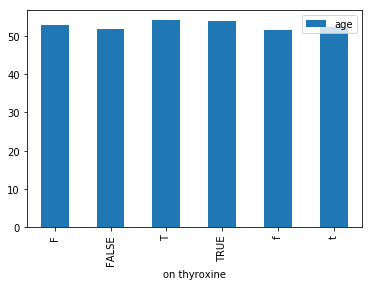

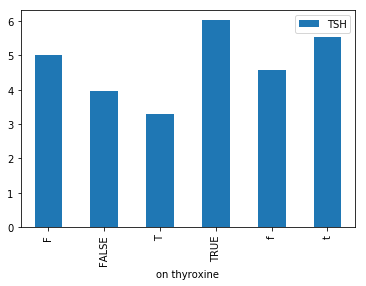

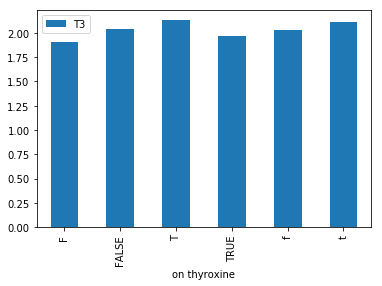

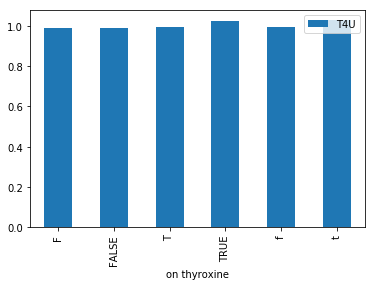

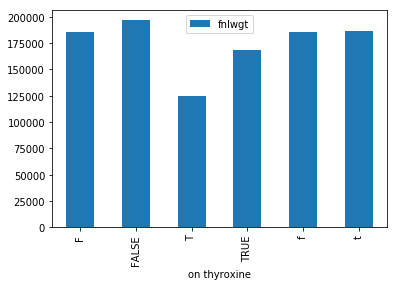

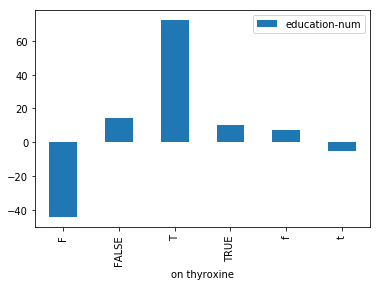

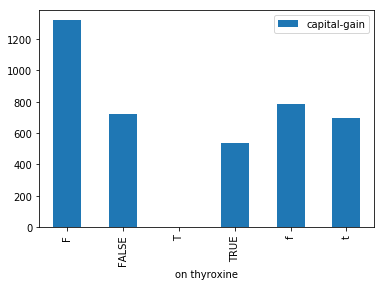

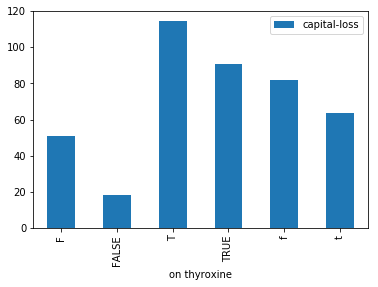

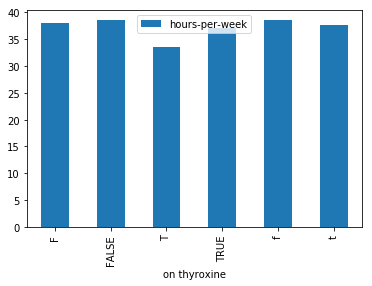

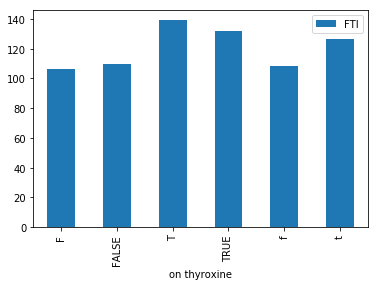

In [5]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('on thyroxine').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('query on thyroxine').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('pregnant').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('thyroid surgery').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('I131 treatment').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('lithium').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('goitre').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('tumor').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('hypopituitary').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('T3 measured').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('TT4').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('FTI measured').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('TBG measured').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('TBG').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('referral source').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('class').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('workclass').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('education').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('marital-status').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('occupation').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)

plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('relationship').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
                
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('race').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
 
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('native-country').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)

plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('date_of_birth').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
      
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('TSH measured').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
         
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('sex').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
       
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('query hyperthyroid').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
         
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('TT4 measured').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('on antithyroid medication').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('FTI').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('sick').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('T4U measured').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('psych').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

In [ ]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('query hypothyroid').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()

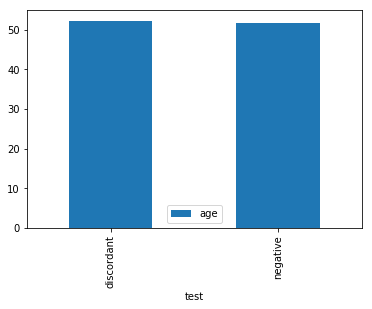

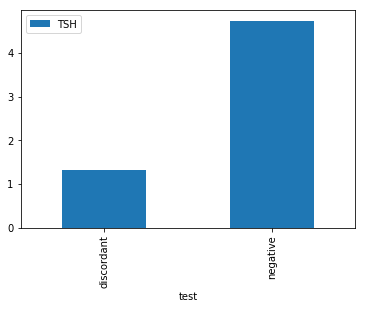

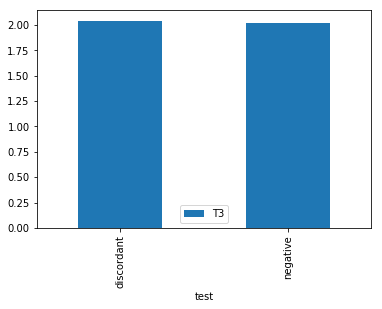

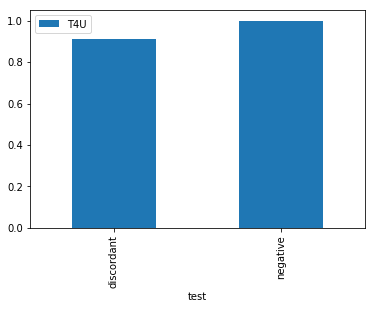

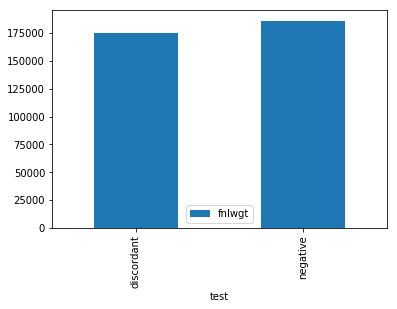

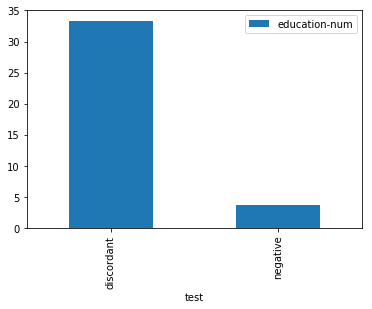

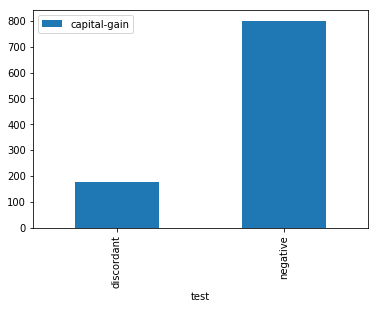

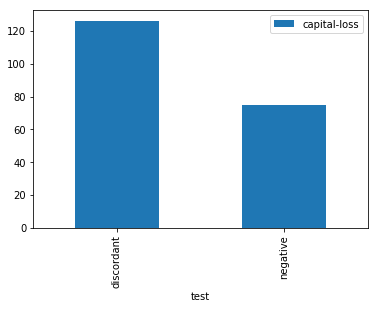

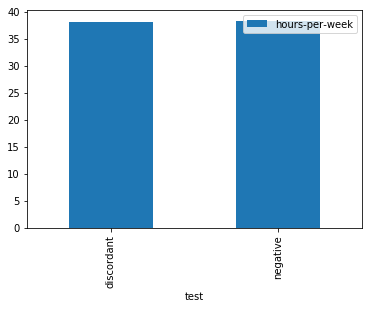

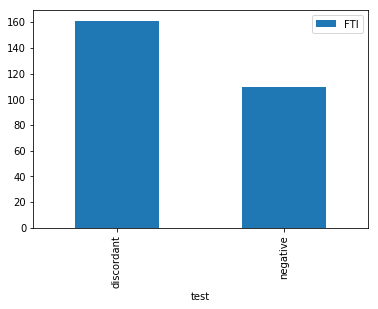

In [4]:
for column2 in train_data.columns:
    if np.issubdtype(train_data[column2].dtype, np.number):
        TSH_by_preg = train_data.groupby('test').mean()[[column2]]
        TSH_by_preg.plot.bar(stacked=True)
        
plt.show()